In [1]:
pip install opendatasets

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import opendatasets as od
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

In [3]:
od.download("https://www.kaggle.com/datasets/techsash/waste-classification-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: harshal114
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data


100%|██████████| 427M/427M [00:02<00:00, 158MB/s]


In [4]:
test_data="/content/waste-classification-data/DATASET/TEST"
initail_train_data="/content/waste-classification-data/DATASET/TRAIN"

In [5]:
train_datagen= ImageDataGenerator(
    rescale=1./255.,
    rotation_range=20,       # Rotate images by up to 20 degrees
    shear_range=0.2,         # Apply shear transformation
    zoom_range=0.2,          # Apply zoom
    horizontal_flip=True,    # Flip images horizontally
    validation_split=0.2
)
test_datagen= ImageDataGenerator(rescale=1./255.)

In [6]:
train_generator = train_datagen.flow_from_directory(initail_train_data, target_size=(64, 64), batch_size=32, class_mode='binary', subset='training')
valid_generator = train_datagen.flow_from_directory(initail_train_data, target_size=(64, 64), batch_size=32, class_mode='binary', subset='validation')
test_generator = test_datagen.flow_from_directory(test_data, target_size=(64, 64), batch_size=32, class_mode='binary')

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [7]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.6),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES=True

In [12]:
history = model.fit(train_generator, validation_data=valid_generator, epochs=100, verbose=1, callbacks=[early_stopping])

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


565/565 ━━━━━━━━━━━━━━━━━━━━ 48s 78ms/step - accuracy: 0.7646 - loss: 0.5099 - val_accuracy: 0.7742 - val_loss: 0.4485
Epoch 2/100
565/565 ━━━━━━━━━━━━━━━━━━━━ 42s 74ms/step - accuracy: 0.8224 - loss: 0.4209 - val_accuracy: 0.8012 - val_loss: 0.4155
Epoch 3/100
565/565 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - accuracy: 0.8306 - loss: 0.4038 - val_accuracy: 0.8136 - val_loss: 0.4320
Epoch 4/100
565/565 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.8328 - loss: 0.3924 - val_accuracy: 0.7830 - val_loss: 0.4514
Epoch 5/100
565/565 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - accuracy: 0.8435 - loss: 0.3816 - val_accuracy: 0.7965 - val_loss: 0.4194
Epoch 6/100
565/565 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.8487 - loss: 0.3651 - val_accuracy: 0.8030 - val_loss: 0.4116
Epoch 7/100
565/565 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.8490 - loss: 0.3617 - val_accuracy: 0.8373 - val_loss: 0.3690
Epoch 8/100
565/565 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - accuracy: 0.8476 - loss: 0.3583 - val_

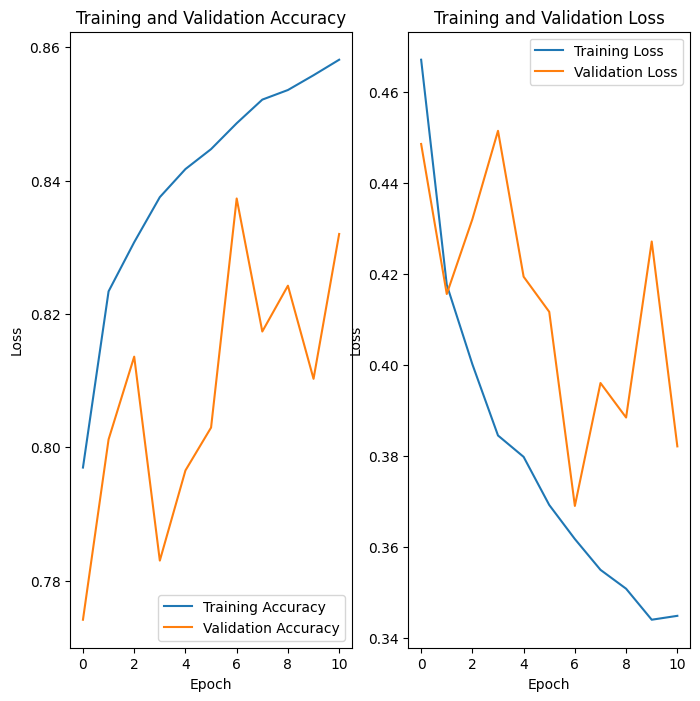

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(11)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
loss, accuracy = model.evaluate(test_generator)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8546 - loss: 0.3525
Test Loss: 0.3649437725543976
Test Accuracy: 0.8460007905960083


In [22]:
import pandas as pd


final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

data = {'Dataset': ['Training', 'Validation', 'Test'],
        'Accuracy': [final_train_acc, final_val_acc, accuracy]}

df = pd.DataFrame(data)

print("Comparison of Training, Validation, and Test Accuracy:")
display(df)

Comparison of Training, Validation, and Test Accuracy:


,Dataset,Accuracy
0,Training,0.858132
1,Validation,0.832004
2,Test,0.846001


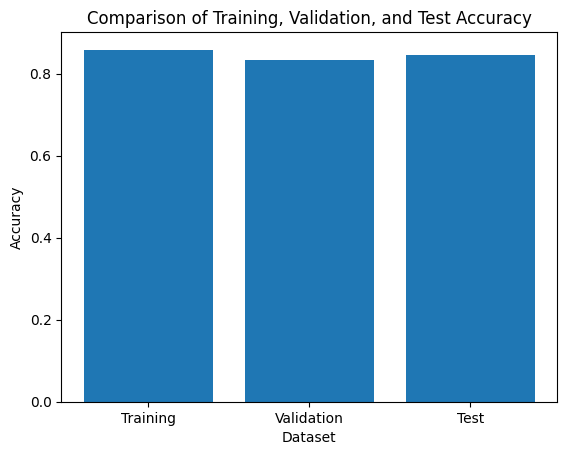

,Dataset,Accuracy
0,Training,0.858132
1,Validation,0.832004
2,Test,0.846001


In [24]:
plt.bar(df['Dataset'],df['Accuracy'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparison of Training, Validation, and Test Accuracy')
plt.show()
df.head()

In [30]:
image_path="/content/test2.jpg"

In [31]:
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((64, 64))
    img = img.convert('RGB')
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [32]:
img_array=preprocess_image(image_path)


In [33]:
prediction = model.predict(img_array)
print("Prediction probability:", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction probability: 0.5924953


In [34]:
if prediction[0][0] > 0.5:
    predicted_class = 'Recyclable'
else:
    predicted_class = 'Organic'

print("Predicted class:", predicted_class)

Predicted class: Recyclable
